In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as mpl  # 用于在图中显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认|字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
"""
如保sns绘图修改tickit字体大小？
关于seaborn在条形图上标注数值的方法
"""
"""
seaborn绘图文章
https://blog.csdn.net/herr_kun/article/details/87697639
https://blog.csdn.net/Artoria_QZH/article/details/102768817
https://blog.csdn.net/Artoria_QZH/article/details/102790740
https://blog.csdn.net/Artoria_QZH/article/details/102868460
https://blog.csdn.net/Artoria_QZH/article/details/103217136
https://blog.csdn.net/Artoria_QZH/article/details/103218063/
http://seaborn.pydata.org/
"""
import pandas as pd
def skload(name):
    if name=='boston':
        from sklearn.datasets import load_boston as loading
    elif name=='cancer':
        from sklearn.datasets import load_breast_cancer as loading
    elif name=='iris':
        from sklearn.datasets import load_iris as loading
    elif name=='wine':
        from sklearn.datasets import load_wine as loading
    else:
        print('choice: boston, cancer, iris, wine')
    data = loading(return_X_y=False)
    df = pd.DataFrame(data['data'], columns=data['feature_names'])
    df['label'] = data['target']
    return df
boston = skload('boston')

# seaborn部分

### base

In [ ]:
"""数据"""
boston = skdata('boston')
n=range(3)

In [ ]:
"""
注意版本，老版本的很多API不能使用了
np.nan和None对绘图的影响
图形组合也就是两条绘图语句一起运行就可以了，相当于图形覆盖了
https://blog.csdn.net/Artoria_QZH/article/details/102768817
https://blog.csdn.net/Artoria_QZH/article/details/103218063
"""
sns.displot(data=df, x='c1',y='c2',kind='kde').set(title='t',xlim=(0,10),ylim=(0,10),xticks=[0,1,10],yticks=[0,10]).set_axis_labels('x','y').set_xticklabels(list('abc')).set_yticklabels(list('ab'))  # 可以只有x
"""同一画布上叠加图，在一个单元格中执行就可，下面两种绘图可在画布上叠加"""
sns.pointplot(df['a'])
sns.kdeplot(df['b'])

In [ ]:
"""
num:图像编号或名称，数字为编号 ，字符串为名称
figsize:宽和高(英寸)。
dpi:每英寸像素(分辨率)，defalt=80。
frameon:是否显示边框"""
plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
plt.close()  # 将完全关闭数字窗口
plt.clf()  # 只会清除数字 - 您仍然可以在其上绘制另一个绘图。
_ = sns.set_style("ticks")  # dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}

In [ ]:
"""
指定颜色
palette: 'Blues_d', 'Reds_d', Greens_d，'Greys_d'，'Oranges_d'
"""
sns.color_palette()  # show the palette
sns.color_palette("pastel")
sns.color_palette("husl", 9)
sns.color_palette("Set1")
sns.color_palette("Set2")
sns.color_palette("Set3")
sns.color_palette("flare", as_cmap=True)  # 当as_cmap=True是渐近连续颜色，当as_cmap=False是离散的格子。
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=False)
pal = sns.color_palette("Greens_d",5)  # 可以指定渐变个数，并赋值给变量
pal  # 是个三原色的列表
"""给每一个柱指定颜色，数量不对应的话，先用前面的颜色"""
sns.countplot(data=boston,y='CHAS',palette= sns.color_palette("Greens_d",5))

In [ ]:
"""图中图绘制"""
fig = plt.figure(figsize=(8,3),)
ax1 = fig.add_subplot(1,1,1)  # origin
ax2 = fig.add_subplot(4,4,16)  # 在4*4网络中的第16格绘图
ax3 = fig.add_axes([0.2, 0.5, 0.1, 0.4]) # parameter: left, bottom, width, height
sns.scatterplot(x=n, y=n,ax=ax1)
sns.scatterplot(x=n, y=n,ax=ax2)
sns.scatterplot(x=n, y=n,ax=ax3)

In [ ]:
"""网格绘图"""
fig,axes = plt.subplots(2,2,sharex=False,sharey=False,figsize=(6,3))
sns.scatterplot(x=n, y=n, ax=axes[0,0])
ax11 = axes[1,1]  # 也可以先给坐标赋个值，后面使用
sns.scatterplot(x=n, y=n, ax=ax11)

"""当网格为一列时，axes索引仅1维"""
def draw(df,columns):
    n = len(columns)
    fig,axes = plt.subplots(n,1,sharex=False,sharey=False,figsize=(16,n*4))
    for i in range(n):
        sns.histplot(data=df,x=columns[i],ax=axes[i])

In [ ]:
"""图参数设置 """
g = sns.displot(x=range(3),y=range(3),)
g.set(title='TT',xlim=(-1,4),ylim=(-1,4),xticks=[-0.5,0,2.5],yticks=[-0.5,0,2.5])
g.set_axis_labels('xxx','yyy')

In [ ]:
"""也可以直接连起来写，注意scatterplot没有set_axis_labels方法"""
sns.scatterplot(x=[1,3],y=[1,3]).set(title='TT',xlim=(-1,4),ylim=(-1,4),xticks=[-0.5,2],yticks=[-0.5,3])

In [ ]:
"""在图上添加文本，每次只能添加一个文本"""
sns.scatterplot(x=range(3),y=range(3)).text(x=1,y=1,s='here',fontsize=22,color='red',ha='center',va='top')
"""添加多个文本可这样玩"""
[g.text(x=i,y=j,s='here')  for i,j in enumerate(range(3))]

In [ ]:
"""多个维度分开绘图"""
temp = pd.DataFrame({'country':['A1','A1','A1','A1','A2','A2','A2','A2'],
                     'seg':    ['S1','S2','S1','S2','S1','S2','S1','S2'],
                     'agegroup':    ['1', '2', '2', '1','1', '2', '2', '1'],
                      'N' : [21,22,23,24,31,32,33,34]})
plot = sns.catplot(data=temp, x='seg', y='N', row='country', kind='bar',hue='agegroup',legend=True,)

### Relational plots

In [ ]:
sns.scatterplot(data=boston,x='RM',y='LSTAT')
sns.lineplot(data=boston,x='RM',y='LSTAT')

### Distribution plots

In [ ]:
"""
np.nan和None剔除，False和True分别按0和1计算
hist中，如果分箱太细，直方条的颜色会变成灰白色看不清，需控制分箱的粒度
"""
sns.displot(data=boston, x='AGE', kind = 'kde')  # kind:kde,hist,ecdf
sns.histplot(data=boston, x='AGE')
sns.kdeplot(data=boston, x='AGE')
sns.ecdfplot(data=boston, x='AGE')
sns.distplot(x=boston['AGE'], rug=True, hist=False)
sns.rugplot(data=boston, x='AGE',y='label',hue='CHAS',alpha=0.2)

### Categorical plots

In [ ]:
"""kind:strip, swarm, box, violin, boxen, point, bar, count"""
sns.catplot(data=boston, x="RAD", y="label", hue="CHAS", )
sns.catplot(data=boston, x="RAD", y="label", hue="CHAS", kind='violin')
"""不带分布的散点图,jitter=0.3, 抖动项控制大小，也可直接为True或False"""
sns.stripplot(x=np.random.randn(111),jitter=0.1)
"""带分布的散点图"""
sns.swarmplot( data=boston, x='RAD', y='AGE', color='.25', size=1)  # vertical
sns.boxplot(x="RAD", y="AGE", data=boston,hue='CHAS')
sns.violinplot(data=boston, x="RAD", y="label", hue="CHAS",)
sns.boxenplot(x="CHAS", y="AGE", data=boston)
sns.pointplot(x="RAD", y="AGE", data=boston)
"""estimator跟函数，sum,min,max,len,np.mean,np.median,lambda x:max(x)-min(x),自定义函数"""
sns.barplot(data=boston, x='RAD', y='AGE',hue='CHAS', estimator=len)
"""np.nan和None剔除，False和True分别按0和1计算"""
sns.countplot(data=boston,y='RAD')

### Regression plots

In [ ]:
sns.lmplot(x="AGE", y="RM", hue="CHAS", data=boston, aspect=2)

### Matrix plots

In [ ]:
sns.heatmap(data=[range(3),range(2,5)])
sns.clustermap(data=boston[['CRIM','RM','AGE',]])

### Multi-plot grids

In [ ]:
sns.pairplot(boston[['CRIM','RM','AGE']])  # 两两绘制散点图
sns.PairGrid(boston[['CRIM','RM','AGE']]).map(sns.scatterplot)
sns.FacetGrid(boston, col='RAD',  row='CHAS').map(sns.scatterplot, 'AGE', 'DIS')

### 其他

In [ ]:
"""3D绘图"""
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d as p3d
import numpy as np
%matplotlib notebook
fig = plt.figure()
ax = p3d.Axes3D(fig)
ax.scatter(df['brake'],df['tratio'],df['ratio'])
ax.set_xlabel('制动次数/时间')
ax.set_ylabel('制动高状态持续时间比例')
ax.set_zlabel('空压机工作率')
x = np.linspace(0, 0.03, 2)
y = np.linspace(0, 1, 2)
X, Y = np.meshgrid(x, y)
# ax.plot_surface(X,Y,Z=13.2314*X+0.01858*Y+0.05499,color='white')
plt.show()

# matplotlib部分

In [3]:
ir = pd.read_csv('.\\iris.csv', header=0, encoding='utf-8')
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)
ax5 = fig.add_subplot(4,2,5)
ax6 = fig.add_subplot(4,2,6)
ax7 = fig.add_subplot(4,2,7)
ax8 = fig.add_subplot(4,2,8)
ax1.plot([1,4,2,3])
ax1.plot([2,2,4,1])
ax2.plot([1,4,2,3],[1,2,3,4])
ax3.hist(np.random.randn(100),bins=20)
ax4.bar([1,2,3,4],[1,4,2,3])
ax5.scatter([1,2,3,4],[3,2,1,5], s=[111,44,22,11])
ax6.pcolormesh(np.array([[0,0,0,0],[0,1,1,1],[1,1,1,1]]),cmap=matplotlib.cm.Greens)
ax7.boxplot([np.random.randn(100),np.random.randn(100)])

In [ ]:
"""图的尺寸太大打印不出来，但是可以保存成图片"""
plt.figure(figsize=(16,8))
plt.savefig(fname="e.png")

In [ ]:
"""且所有的操作均在plt.gca( )中完成，gca就是get current axes的意思"""
ax = plt.gca()

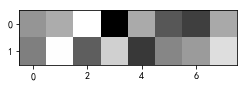

In [9]:
plt.figure(figsize=(8,1))
plt.imshow(np.random.randn(16).reshape(2,8), cmap="gray")